Machine learning models are mainly evaulated using the below metrics based on the type of model. 

**Classification Models:**
1. Confusion Matrix
2. Accuracy
3. Accuracy alternatives
4. Precision and Recall
5. F-Score
6. Log Loss
7. Gini Coefficient
8. AUC-ROC

**Regression models:**
1. MAE(Mean Absolute Error)
2. MSE(Mean Square Error)
3. RMSE(Root Mean Square Error)
4. RMSLE(Root Mean Square Log Error)
5. R2 and Adjusted R2

Source: analyticsvidhya.com

Let us have a Classification model built to evaluate

In [19]:
# Step 1: Import libraries
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load dataset
iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)  # Binary: 1 if Virginica, else 0

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = model.predict(X_test) # Get predicted classes
y_scores = model.predict_proba(X_test)[:, 1] # Get predicted probabilities

### Confusion Matrix

This is `n*n` matric where `n` is the number of prediction classes. The `columns` show `predicted` outcomes and `rows` show `actual` outcomes.


|                      | Predicted Positive | Predicted Negative |
|----------------------|--------------------|--------------------|
| **Actual Positive**  | ***True Positive (TP)*** | False Negative (FN)|
| **Actual Negative**  | False Positive (FP)| ***True Negative (TN)*** |


Generally, the emphasized diagonal elements should be higher if the model performs well. 

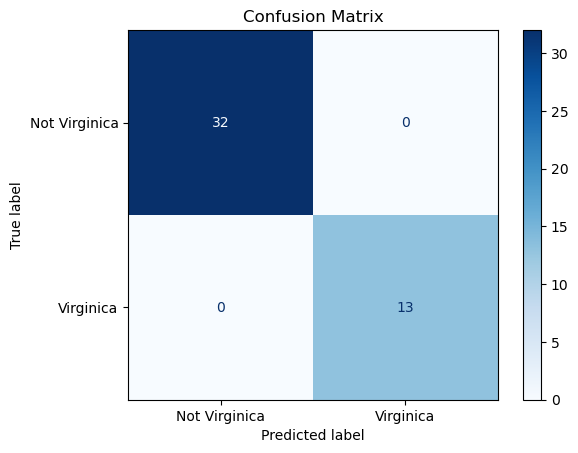

In [7]:
#Generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Virginica", "Virginica"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Accuracy

### Accuracy = $\frac{Correct Predictions}{Total Predictions}$

Based on the confusion matrix, it can be rewritten as

### Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$


Accuracy should be `used cautiously` as can be flawed certain scenarios. 

|                      | Predicted Positive | Predicted Negative |
|----------------------|--------------------|--------------------|
| **Actual Positive**  | ***10*** | 0|
| **Actual Negative**  | 2| ***0*** |

Accuracy in the above case (data is `imbalanced` where most is positive and model is `dumb` predicting positive for all) is 10/12 = 83% which is a higher accuracy for a `dumb` model than the below model which gets 9/12 = 75% accuracy.

|                      | Predicted Positive | Predicted Negative |
|----------------------|--------------------|--------------------|
| **Actual Positive**  | ***9*** | 1|
| **Actual Negative**  | 2| ***0*** |

There are other metrics that become handy in such cases.

`True Positive Rate` = Out of all actual positives, how many are true positives  [↑ `higher` is better]  
`False Negative Rate` = Out of all actual positives, how many are false negatives  [↓ lower is better]  
`True Negative Rate` = Out of all actual negatives, how many are true negatives  [↑ `higher` is better]  
`False Positive Rate` = Out of all actual negatives, how many are false positives [↓ lower is better]   

In the dumb model case,

|                      | Predicted Positive | Predicted Negative |
|----------------------|--------------------|--------------------|
| **Actual Positive**  | ***10*** | 0|
| **Actual Negative**  | 2| ***0*** |

`True Positive Rate` = 10/10 = 100%  
`False Negative Rate` = 0/10 = 0%  
`True Negative Rate` = 0/2 = 0%  [↑ higher is better, here it is low]  
`False Positive Rate` = 2/2 = 100%  [↓ lower is better, here it is high] 

So using these metrics gives out the information that something is not right. 

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [14]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

TPR = tp / (tp + fn)
FNR = fn / (fn + tp)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)


print(f"TPR (Recall): {TPR:.2f}")
print(f"FNR: {FNR:.2f}")
print(f"TNR (Specificity): {TNR:.2f}")
print(f"FPR: {FPR:.2f}")

TPR (Recall): 1.00
FNR: 0.00
TNR (Specificity): 1.00
FPR: 0.00


### Precision and Recall

`Precision` is critical when `false POSITIVES are costly`. Example: In spam detection, you don’t want to wrongly classify important emails as spam.

`Recall` is vital when `false NEGATIVES are costly`. Example: In disease screening, missing a positive case could be dangerous.

Precision = Correct positive predictions out of all positive predictions = TP/(TP + `FP`)  
Recall = Correct negative predictions out of all positive predictions = TP/(TP + `FN`)

In [15]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 1.0000
Recall: 1.0000


There is a trade-off between precision and recall as increasing one will decrease other. `F1 Score` helps balancing precision and recall. 

### F1 Score

F1 Score is maximized when both false positives and false negatives carry significant costs. Example: Avoiding false alarms while catching actual spam

F1 score is the `harmonic mean` of precision and recall. 

### F1 Score = $\frac{2 * Precision * Recall}{Precision + Recall}$



where 1 indicates perfect precision and recall, and 0 means the model failed completely. Read: F1-Beta.

In [17]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

F1 Score: 1.0000


Above metrics work for the models results that are classes instead of probabilities. When dealing with probabilities as model results,  we need some higher order metrics.

### AUC-ROC: Area Under the ROC Curve

This is a curve plotted usinge the 2 `positive rates`(TPR and FPR). It quantifies the overall ability of the model to discriminate between positive and negative classes.

AUC ranges from 0 to 1:

1.0 → Perfect classifier

0.5 → No discrimination (random guessing)

< 0.5 → Worse than random (model is confused)



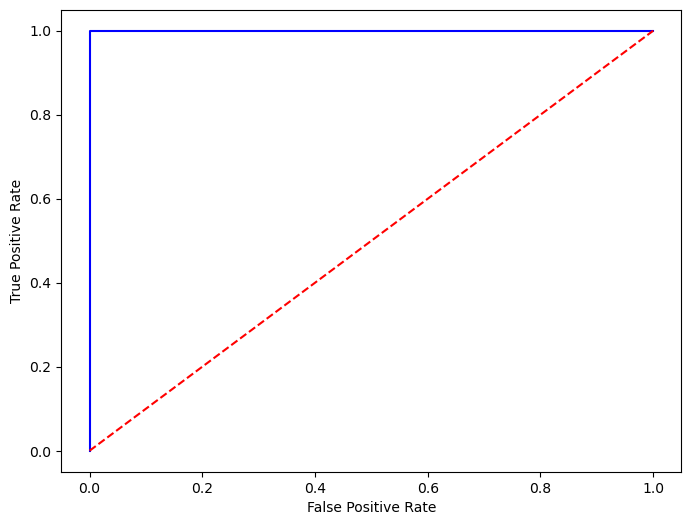

In [21]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()